In [1]:
import nibabel as nib
from os.path import expanduser
home = expanduser("~")
import os

import matplotlib.pyplot as plt
import numpy as np
import glob
import shutil
#from PIL import Image
#import uuid
#import string, random
import csv
#import imageio
#import tifffile as tif

from os import listdir
from os.path import splitext

In [2]:
# put all the same type of image together in the same directory
src_directory = home+'/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/data/'
dst_directory = home+'/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/img_all/'
dst_dir_mask = home+'/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/img_classification/ribbon_space-T2w_dseg/'
dst_dir_imgs = home+'/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/img_classification/restore_T2w/'
dst_dir_liq = home+'/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/img_classification/drawem9_space-T2w_dseg/'


if not os.path.isdir(dst_directory):
    os.mkdir(dst_directory)
    
if not os.path.isdir(dst_dir_mask):
    os.mkdir(dst_dir_mask)
    
if not os.path.isdir(dst_dir_imgs):
    os.mkdir(dst_dir_imgs)
    
if not os.path.isdir(dst_dir_liq):
    os.mkdir(dst_dir_liq)

### obtain the MRI date of all the subjects

In [3]:
mri_directory = home+'/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/data/'

#get directories for each subject
mri_subjects = glob.glob(mri_directory + 'sub-*' +'/sub-*_sessions.tsv', recursive=True)
# mri_sessions = glob.glob(mri_directory + 'sub-*' +'/ses-*', recursive=True)

mri_list = []

for i in range(len(mri_subjects)):
    with open(mri_subjects[i], newline='') as tsvfile:
        subject = mri_subjects[i].split('/')[10].split('-')[1]
        # session = mri_sessions[i].split('/')[10].split('-')[1]
        
        reader_mri = csv.reader(tsvfile, delimiter='\t')
        data_mri = list(reader_mri)
        data_mri.pop(0)
        
        for j in range(len(data_mri)):
            #print(str(j)+'\t'+str(data_mri))
            vect = [subject, data_mri[j][0], round(float(data_mri[j][1]))]
            mri_list.append(vect)
    
def take_third(elem):
    return elem[2]
    
mri_date_s = sorted(mri_list, key=take_third)

mri_date_20 = []
mri_subj_20 = []
count_mri = 0

for i in range(len(mri_date_s)):
    if count_mri < 600:
        #if not any(mri_date_s[i][0] in s for s in mri_date_20):
            # print(mri_date_s[i])
        count_mri += 1
        mri_date_20.append(mri_date_s[i])  # ["id", "birth_date"]
        mri_subj_20.append(mri_date_s[i][0]+'_'+mri_date_s[i][1])
            
with open(dst_directory+'mri_date.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    writer.writerow(['Subject', 'Session', 'MRI date'])
    for i in range(len(mri_date_20)):
        writer.writerow(mri_date_20[i])
        
# print(sorted(mri_subj_20))

### obtain the birth date of all the subjects

In [13]:
"""# obtain birth date

with open(src_directory+'participants.tsv', newline='') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    data_birth = list(reader)
    
variables = data_birth[0]
data_birth.pop(0)
birth_date = []

for row in data_birth:
    vect = [row[0], row[2]] # ["id", "birth_date"]
    birth_date.append(vect)
    
def take_second(elem):
    return elem[1]
    
birth_date_s = sorted(birth_date, key=take_second)

birth_date_20 = []
count_birth = 0

for i in range(len(birth_date_s)):
    if float(birth_date_s[i][1]) < 30 and count_birth < 20:
        count_birth += 1
        birth_date_20.append(birth_date_s[i])  # ["id", "birth_date"]
        
# print(birth_date_20)"""

### classify the files

In [8]:
src_subjects = glob.glob(src_directory+'sub-*', recursive=True)
num_cortex = 0
    
for subject in src_subjects:

    sub = subject.split('/')[10].split('-')[1]        
    src_sessions =  glob.glob(subject+'/ses-*', recursive=True)
    
    for session in src_sessions:
    
        ses = session.split('/')[11].split('-')[1]
        name = sub+'_'+ses

        if any(name in s for s in mri_subj_20): # birth_date_20

            # from here the masks are obtained
            src_cortex = glob.glob(session+'/*-ribbon_space-T2w_dseg.nii.gz')
            if len(src_cortex) == 1:      
                shutil.copy2(src_cortex[0], dst_dir_mask)

                # from here the images are used if the corresponding image can be obtained
                src_t2w = glob.glob(session+'/*-restore_T2w.nii.gz')[0]
                shutil.copy2(src_t2w, dst_dir_imgs)

                src_liq = glob.glob(session+'/*-drawem9_space-T2w_dseg.nii.gz')[0]
                shutil.copy2(src_liq, dst_dir_liq)

                num_cortex += 1
                    
img_t2w = sorted(glob.glob(dst_dir_imgs+'/*-restore_T2w.nii.gz'))
img_cortex = sorted(glob.glob(dst_dir_mask+'/*-ribbon_space-T2w_dseg.nii.gz'))
img_liq = sorted(glob.glob(dst_dir_liq+'/*-drawem9_space-T2w_dseg.nii.gz'))

In [4]:
img_t2w_ = sorted(glob.glob(dst_directory+'ribbon_space-T2w_dseg/imgs_3D/*'))
img_cortex_ = sorted(glob.glob(dst_directory+'ribbon_space-T2w_dseg/mask_3D/*'))
img_liq_ = sorted(glob.glob(dst_directory+'ribbon_space-T2w_dseg/total_mask_3D/*'))

In [5]:
img_t2w = sorted(glob.glob(dst_dir_imgs+'/*-restore_T2w.nii.gz'))
img_cortex = sorted(glob.glob(dst_dir_mask+'/*-ribbon_space-T2w_dseg.nii.gz'))
img_liq = sorted(glob.glob(dst_dir_liq+'/*-drawem9_space-T2w_dseg.nii.gz'))

### To generate the masks

In [7]:
count = 0

dirr = img_cortex

for j in range(len(dirr)):
    sub = dirr[j].split('/')[11].split('_')[0].split('-')[1]
    ses = dirr[j].split('/')[11].split('_')[1].split('-')[1]

    sub_liq = img_liq[j].split('/')[11].split('_')[0].split('-')[1]
    ses_liq = img_liq[j].split('/')[11].split('_')[1].split('-')[1]

    img_ = nib.load(dirr[j])
    data_m = img_.get_fdata()
    data_liq = nib.load(img_liq[j]).get_fdata()

    mask_cp = np.random.rand(*data_m.shape)
    mask_t = np.random.rand(*data_m.shape)

    """# mask for cortical plate
    print('CP mask for '+str(sub)+'-'+str(ses))
    for i in range(len(data_m[1,1,:])):
        # values of the cortical plate
        mask_cp[:,:,i] = (data_m[:,:,i] == 42)
        mask_cp[:,:,i] += (data_m[:,:,i] == 3)"""
    
    # 2, 3, 1+4+5, 7+9, 6+8
    
    print('Mask for '+str(sub)+'-'+str(ses))
    for i in range(len(data_m[1,1,:])):
        # values of the cortical plate
        mask_t[:,:,i] = np.where(data_liq[:,:,i] == 1, 1, 0)
        mask_t[:,:,i] += np.where(data_liq[:,:,i] == 5, 1, 0)
        mask_t[:,:,i] += np.where(data_liq[:,:,i] == 2, 2, 0)
        mask_t[:,:,i] += np.where(data_liq[:,:,i] == 3, 3, 0)
        mask_t[:,:,i] += np.where(data_liq[:,:,i] == 7, 4, 0)
        
    print(np.unique(mask_t))

    """    if sub == sub_liq:
        if ses == ses_liq:
            print('Total mask for '+str(sub)+'-'+str(ses))
            #mask for the whole brain
            for i in range(len(data_m[1,1,:])):
                #mask_t[:,:,i] = (data_m[:,:,i] == 42)
                #mask_t[:,:,i] += (data_m[:,:,i] == 3)
                #mask_t[:,:,i] += (data_m[:,:,i] == 2)
                #mask_t[:,:,i] += (data_m[:,:,i] == 41)
                mask_t[:,:,i] += (data_liq[:,:,i] == 1)
                mask_t[:,:,i] += (data_liq[:,:,i] == 2)
                mask_t[:,:,i] += (data_liq[:,:,i] == 3)
                mask_t[:,:,i] += (data_liq[:,:,i] == 5)
                mask_t[:,:,i] += (data_liq[:,:,i] == 6)
                mask_t[:,:,i] += (data_liq[:,:,i] == 7)
                mask_t[:,:,i] += (data_liq[:,:,i] == 8)
                mask_t[:,:,i] += (data_liq[:,:,i] == 9)"""

    #threshold = 1
    #mask_t = np.where(mask_t>threshold, 1, 0)

    for k in range(len(img_t2w)):
        sub_ = img_t2w[k].split('/')[11].split('_')[0].split('-')[1]

        if sub == sub_:

            ses_ = img_t2w[k].split('/')[11].split('_')[1].split('-')[1]

            if ses == ses_:

                mask_ = mask_t.astype(np.float32)
                mask_cp = nib.Nifti1Image(mask_, img_.affine, img_.header)

                #mask_tt = mask_t.astype(np.float32)
                #mask_nt = nib.Nifti1Image(mask_tt, img_.affine, img_.header)

                #data_ = data_m.astype(np.float32)
                #data_n = nib.Nifti1Image(data_, img_.affine, img_.header)

                #nib.save(data_n, dst_directory+'ribbon_space-T2w_dseg/imgs_3D/'+str(sub)+'_'+str(ses)+'.nii.gz')
                #nib.save(mask_cp, dst_directory+'ribbon_space-T2w_dseg/mask_3D/'+str(sub)+'_'+str(ses)+'.nii.gz')
                nib.save(mask_cp, dst_directory+'ribbon_space-T2w_dseg/mask_3D_multi_v4/'+str(sub)+'_'+str(ses)+'.nii.gz')
                #nib.save(mask_nt, dst_directory+'ribbon_space-T2w_dseg/total_mask_3D/'+str(sub)+'_'+str(ses)+'.nii.gz')

                # copy the corresponding image of the mask with the same name
                #shutil.copy2(img_t2w[k], dst_directory+'restore_T2w/'+str(sub)+'_'+str(ses)+'.nii.gz')

                count += 1

                print('Count: '+str(count))
                print('Subject: '+str(sub)+' \t Session: '+str(ses))



Mask for CC00060XX03-12501
[0. 1. 2. 3. 4.]
Count: 1
Subject: CC00060XX03 	 Session: 12501
Mask for CC00062XX05-13801
[0. 1. 2. 3. 4.]
Count: 2
Subject: CC00062XX05 	 Session: 13801
Mask for CC00063AN06-15102
[0. 1. 2. 3. 4.]
Count: 3
Subject: CC00063AN06 	 Session: 15102
Mask for CC00065XX08-18600
[0. 1. 2. 3. 4.]
Count: 4
Subject: CC00065XX08 	 Session: 18600
Mask for CC00066XX09-19200
[0. 1. 2. 3. 4.]
Count: 5
Subject: CC00066XX09 	 Session: 19200
Mask for CC00067XX10-20200
[0. 1. 2. 3. 4.]
Count: 6
Subject: CC00067XX10 	 Session: 20200
Mask for CC00068XX11-20701
[0. 1. 2. 3. 4.]
Count: 7
Subject: CC00068XX11 	 Session: 20701
Mask for CC00069XX12-26300
[0. 1. 2. 3. 4.]
Count: 8
Subject: CC00069XX12 	 Session: 26300
Mask for CC00071XX06-27000
[0. 1. 2. 3. 4.]
Count: 9
Subject: CC00071XX06 	 Session: 27000
Mask for CC00073XX08-27800
[0. 1. 2. 3. 4.]
Count: 10
Subject: CC00073XX08 	 Session: 27800
Mask for CC00074XX09-28000
[0. 1. 2. 3. 4.]
Count: 11
Subject: CC00074XX09 	 Session: 280

[0. 1. 2. 3. 4.]
Count: 90
Subject: CC00200XX02 	 Session: 67204
Mask for CC00201XX03-67600
[0. 1. 2. 3. 4.]
Count: 91
Subject: CC00201XX03 	 Session: 67600
Mask for CC00202XX04-67800
[0. 1. 2. 3. 4.]
Count: 92
Subject: CC00202XX04 	 Session: 67800
Mask for CC00203XX05-69500
[0. 1. 2. 3. 4.]
Count: 93
Subject: CC00203XX05 	 Session: 69500
Mask for CC00216AN10-73100
[0. 1. 2. 3. 4.]
Count: 94
Subject: CC00216AN10 	 Session: 73100
Mask for CC00217XX11-73700
[0. 1. 2. 3. 4.]
Count: 95
Subject: CC00217XX11 	 Session: 73700
Mask for CC00218AN12-74801
[0. 1. 2. 3. 4.]
Count: 96
Subject: CC00218AN12 	 Session: 74801
Mask for CC00218BN12-74800
[0. 1. 2. 3. 4.]
Count: 97
Subject: CC00218BN12 	 Session: 74800
Mask for CC00219XX13-86600
[0. 1. 2. 3. 4.]
Count: 98
Subject: CC00219XX13 	 Session: 86600
Mask for CC00221XX07-75000
[0. 1. 2. 3. 4.]
Count: 99
Subject: CC00221XX07 	 Session: 75000
Mask for CC00223XX09-75900
[0. 1. 2. 3. 4.]
Count: 100
Subject: CC00223XX09 	 Session: 75900
Mask for CC002

Mask for CC00398XX20-123100
[0. 1. 2. 3. 4.]
Count: 178
Subject: CC00398XX20 	 Session: 123100
Mask for CC00400XX04-123700
[0. 1. 2. 3. 4.]
Count: 179
Subject: CC00400XX04 	 Session: 123700
Mask for CC00406XX10-122900
[0. 1. 2. 3. 4.]
Count: 180
Subject: CC00406XX10 	 Session: 122900
Mask for CC00406XX10-129200
[0. 1. 2. 3. 4.]
Count: 181
Subject: CC00406XX10 	 Session: 129200
Mask for CC00407AN11-124000
[0. 1. 2. 3. 4.]
Count: 182
Subject: CC00407AN11 	 Session: 124000
Mask for CC00407AN11-137100
[0. 1. 2. 3. 4.]
Count: 183
Subject: CC00407AN11 	 Session: 137100
Mask for CC00408XX12-125500
[0. 1. 2. 3. 4.]
Count: 184
Subject: CC00408XX12 	 Session: 125500
Mask for CC00409XX13-125600
[0. 1. 2. 3. 4.]
Count: 185
Subject: CC00409XX13 	 Session: 125600
Mask for CC00414XX10-127300
[0. 1. 2. 3. 4.]
Count: 186
Subject: CC00414XX10 	 Session: 127300
Mask for CC00415XX11-127400
[0. 1. 2. 3. 4.]
Count: 187
Subject: CC00415XX11 	 Session: 127400
Mask for CC00416XX12-128900
[0. 1. 2. 3. 4.]
Count

[0. 1. 2. 3. 4.]
Count: 264
Subject: CC00553XX09 	 Session: 159000
Mask for CC00556XX12-162902
[0. 1. 2. 3. 4.]
Count: 265
Subject: CC00556XX12 	 Session: 162902
Mask for CC00558XX14-164100
[0. 1. 2. 3. 4.]
Count: 266
Subject: CC00558XX14 	 Session: 164100
Mask for CC00562XX10-191900
[0. 1. 2. 3. 4.]
Count: 267
Subject: CC00562XX10 	 Session: 191900
Mask for CC00563XX11-153900
[0. 1. 2. 3. 4.]
Count: 268
Subject: CC00563XX11 	 Session: 153900
Mask for CC00564XX12-154100
[0. 1. 2. 3. 4.]
Count: 269
Subject: CC00564XX12 	 Session: 154100
Mask for CC00566XX14-164500
[0. 1. 2. 3. 4.]
Count: 270
Subject: CC00566XX14 	 Session: 164500
Mask for CC00570XX10-158900
[0. 1. 2. 3. 4.]
Count: 271
Subject: CC00570XX10 	 Session: 158900
Mask for CC00571AN11-159101
[0. 1. 2. 3. 4.]
Count: 272
Subject: CC00571AN11 	 Session: 159101
Mask for CC00572BN12-161400
[0. 1. 2. 3. 4.]
Count: 273
Subject: CC00572BN12 	 Session: 161400
Mask for CC00572CN12-161200
[0. 1. 2. 3. 4.]
Count: 274
Subject: CC00572CN12 	

Mask for CC00805XX13-24210
[0. 1. 2. 3. 4.]
Count: 351
Subject: CC00805XX13 	 Session: 24210
Mask for CC00815XX15-4120
[0. 1. 2. 3. 4.]
Count: 352
Subject: CC00815XX15 	 Session: 4120
Mask for CC00818XX18-4020
[0. 1. 2. 3. 4.]
Count: 353
Subject: CC00818XX18 	 Session: 4020
Mask for CC00822XX14-15710
[0. 1. 2. 3. 4.]
Count: 354
Subject: CC00822XX14 	 Session: 15710
Mask for CC00823XX15-15810
[0. 1. 2. 3. 4.]
Count: 355
Subject: CC00823XX15 	 Session: 15810
Mask for CC00824XX16-38310
[0. 1. 2. 3. 4.]
Count: 356
Subject: CC00824XX16 	 Session: 38310
Mask for CC00830XX14-30710
[0. 1. 2. 3. 4.]
Count: 357
Subject: CC00830XX14 	 Session: 30710
Mask for CC00833XX17-20510
[0. 1. 2. 3. 4.]
Count: 358
Subject: CC00833XX17 	 Session: 20510
Mask for CC00838XX22-21910
[0. 1. 2. 3. 4.]
Count: 359
Subject: CC00838XX22 	 Session: 21910
Mask for CC00838XX22-30610
[0. 1. 2. 3. 4.]
Count: 360
Subject: CC00838XX22 	 Session: 30610
Mask for CC00840XX16-24910
[0. 1. 2. 3. 4.]
Count: 361
Subject: CC00840XX1

### To take the N youngest subjects

In [9]:
mri_list_ = []
num_subj = 40
train_set = '/Users/meritxell/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/training_set/'

with open('/Users/meritxell/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/img_all/mri_date.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        mri_list_.append(row)
        
mri_list_.pop(0)
count = 0

for i in range(60):
    if count < num_subj:
        idx = mri_list_[i][0]+'_'+mri_list_[i][1]
        print(str(count)+': \t'+idx+':\t'+mri_list_[i][2])

        img_t2w_ = dst_directory+'restore_T2w/'+idx+'.nii.gz'
        #img_cortex_ = dst_directory+'ribbon_space-T2w_dseg/mask_3D/'+idx+'.nii.gz'
        img_cortex_v2_ = dst_directory+'ribbon_space-T2w_dseg/mask_3D_multi_v4/'+idx+'.nii.gz'
        #img_liq_ = dst_directory+'ribbon_space-T2w_dseg/total_mask_3D/'+idx+'.nii.gz'
        file = glob.glob(img_t2w_)

        if len(file) != 0:
            #shutil.copy2(img_t2w_, train_set+'img_3D/'+idx+'.nii.gz')
            #shutil.copy2(img_cortex_, train_set+'CP_mask3D/'+idx+'.nii.gz')
            shutil.copy2(img_cortex_v2_, train_set+'drawem9_multi_v4/mask3D_drawem9_multi_v4/'+idx+'.nii.gz')
            #shutil.copy2(img_liq_, train_set+'total_mask3D/'+idx+'.nii.gz')
            count += 1

0: 	CC00530XX11_153600:	29
1: 	CC00735XX18_222201:	29
2: 	CC00389XX19_119100:	30
3: 	CC00657XX14_193700:	30
4: 	CC00618XX16_177201:	30
4: 	CC00672AN13_197601:	30
4: 	CC00723XX14_211900:	31
5: 	CC00672BN13_200000:	31
6: 	CC00284AN13_90701:	32
7: 	CC00284BN13_90801:	32
7: 	CC00621XX11_177900:	32
7: 	CC00136AN13_45100:	33
8: 	CC00518XX15_145700:	33
9: 	CC00760XX10_229500:	33
10: 	CC00301XX04_96400:	33
11: 	CC00529AN18_151300:	33
12: 	CC00838XX22_21910:	33
13: 	CC00686XX19_198800:	33
14: 	CC00823XX15_15810:	33
15: 	CC00529BN18_151200:	33
16: 	CC00305XX08_98101:	33
17: 	CC00829XX21_17610:	33
17: 	CC00578AN18_164900:	33
17: 	CC00525XX14_150600:	34
18: 	CC00154XX06_50700:	34
19: 	CC00293AN14_97401:	34
20: 	CC00628XX18_181800:	34
21: 	CC00124XX09_42302:	34
22: 	CC00703XX10_206101:	34
23: 	CC00617XX15_176500:	34
24: 	CC00788XX22_243000:	34
25: 	CC00293BN14_97500:	34
25: 	CC00423XX11_127200:	34
25: 	CC00135AN12_44900:	35
26: 	CC00571AN11_159101:	35
27: 	CC00245AN15_82304:	35
28: 	CC00563XX11_153

### To plot the results

[0. 1.]
1.0
0.0


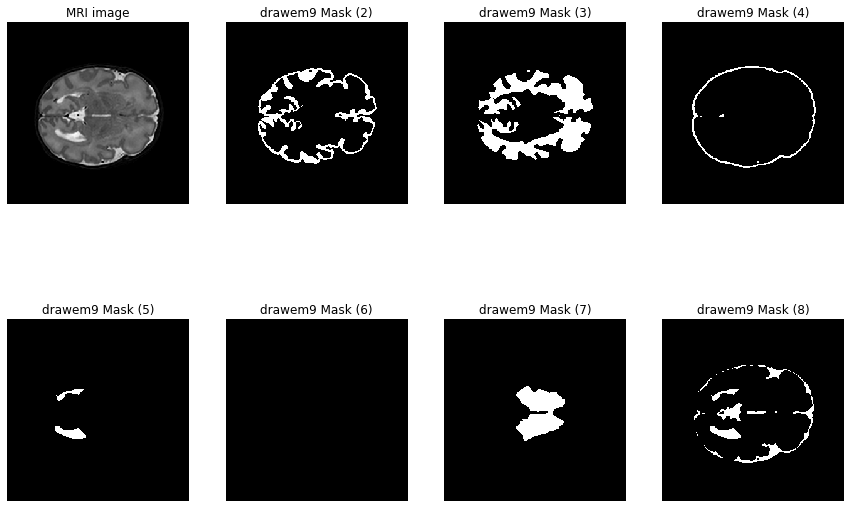

In [10]:
train_set = '/Users/meritxell/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/training_set/'
total_path = train_set+'total_mask3D/CC00218AN12_74801.nii.gz'
mask_path = train_set+'CP_mask3D/CC00218AN12_74801.nii.gz'
image_path = train_set+'img_3D/CC00218AN12_74801.nii.gz'
mask_path_v2 = train_set+'drawem9_2/CP_mask3D_drawem9/CC00218AN12_74801.nii.gz'
mask_path_23 = train_set+'drawem9_23/mask3D_drawem9_23/CC00218AN12_74801.nii.gz'
mask_path_1 = train_set+'drawem9_1/mask3D_drawem9_1/CC00218AN12_74801.nii.gz'
mask_path_3 = train_set+'drawem9_3/mask3D_drawem9_3/CC00218AN12_74801.nii.gz'
mask_path_4 = train_set+'drawem9_4/mask3D_drawem9_4/CC00218AN12_74801.nii.gz'
mask_path_5 = train_set+'drawem9_5/mask3D_drawem9_5/CC00218AN12_74801.nii.gz'
mask_path_6 = train_set+'drawem9_6/mask3D_drawem9_6/CC00218AN12_74801.nii.gz'
mask_path_7 = train_set+'drawem9_7/mask3D_drawem9_7/CC00218AN12_74801.nii.gz'
mask_path_8 = train_set+'drawem9_15/mask3D_drawem9_15/CC00218AN12_74801.nii.gz'
mask_path_all_5 = train_set+'drawem9_all_5/mask3D_drawem9_all_5/CC00218AN12_74801.nii.gz'
mask_path_all_8 = train_set+'drawem9_all_8/mask3D_drawem9_all_8/CC00218AN12_74801.nii.gz'
img = nib.load(image_path).get_fdata()
mask = nib.load(mask_path).get_fdata()
mask_t = nib.load(total_path).get_fdata()
mask_v2 = nib.load(mask_path_v2).get_fdata()
mask_23 = nib.load(mask_path_23).get_fdata()
mask_1 = nib.load(mask_path_1).get_fdata()
mask_3 = nib.load(mask_path_3).get_fdata()
mask_4 = nib.load(mask_path_4).get_fdata()
mask_5 = nib.load(mask_path_5).get_fdata()
mask_6 = nib.load(mask_path_6).get_fdata()
mask_7 = nib.load(mask_path_7).get_fdata()
mask_8 = nib.load(mask_path_8).get_fdata()
mask_all_5 = nib.load(mask_path_all_5).get_fdata()
mask_all_8 = nib.load(mask_path_all_8).get_fdata()

print(np.unique(mask_3))

print(np.max(mask_t))
print(np.min(mask_t))

plt.figure(figsize=(15, 10))
plt.subplot(241)
plt.title('MRI image')
plt.axis('off')
plt.imshow(img[:,:,100], cmap='gray')
plt.subplot(242)
plt.title('drawem9 Mask (2)')
plt.imshow(mask_v2[:,:,100], cmap='gray')
plt.axis('off')
plt.subplot(243)
plt.title('drawem9 Mask (3)')
plt.axis('off')
plt.imshow(mask_3[:,:,100], cmap='gray')
plt.subplot(244)
plt.title('drawem9 Mask (4)')
plt.imshow(mask_4[:,:,100], cmap='gray')
plt.axis('off')
plt.subplot(245)
plt.title('drawem9 Mask (5)')
plt.imshow(mask_5[:,:,100], cmap='gray')
plt.axis('off')
plt.subplot(246)
plt.title('drawem9 Mask (6)')
plt.imshow(mask_6[:,:,150], cmap='gray')
plt.axis('off')
plt.subplot(247)
plt.title('drawem9 Mask (7)')
plt.imshow(mask_7[:,:,100], cmap='gray')
plt.axis('off')
plt.subplot(248)
plt.title('drawem9 Mask (8)')
plt.imshow(mask_8[:,:,100], cmap='gray')
plt.axis('off')
plt.show()

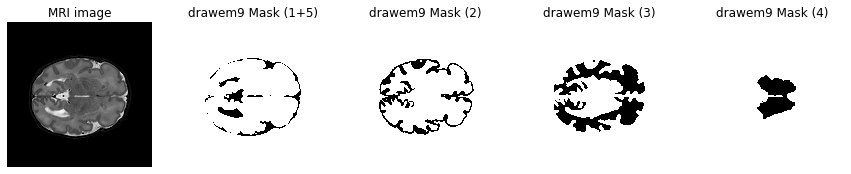

In [11]:
train_set = '/Users/meritxell/Desktop/UPC/DD/Final_Project/Data_analysis/dHCP/training_set/'
total_path = train_set+'total_mask3D/CC00218AN12_74801.nii.gz'
mask_path = train_set+'CP_mask3D/CC00218AN12_74801.nii.gz'
image_path = train_set+'img_3D/CC00218AN12_74801.nii.gz'
mask_path_all_5 = train_set+'drawem9_multi_v4/mask3D_drawem9_multi_v4/CC00218AN12_74801.nii.gz'
img = nib.load(image_path).get_fdata()
mask = nib.load(mask_path).get_fdata()
mask_all_5 = nib.load(mask_path_all_5).get_fdata()

mask_all_5_1= np.zeros((mask_all_5.shape))
mask_all_5_1 = np.where(mask_all_5 == 1, 1, np.nan)
mask_all_5_2 = np.zeros((mask_all_5.shape))
mask_all_5_2 = np.where(mask_all_5 == 2, 1, np.nan)
mask_all_5_3 = np.zeros((mask_all_5.shape))
mask_all_5_3 = np.where(mask_all_5 == 3, 1, np.nan)
mask_all_5_4 = np.zeros((mask_all_5.shape))
mask_all_5_4 = np.where(mask_all_5 == 4, 1, np.nan)

plt.figure(figsize=(15, 10))
plt.subplot(151)
plt.title('MRI image')
plt.axis('off')
plt.imshow(img[:,:,100], cmap='gray')
plt.subplot(152)
plt.title('drawem9 Mask (1+5)')
plt.axis('off')
plt.imshow(mask_all_5_1[:,:,100], cmap='gray')
plt.subplot(153)
plt.title('drawem9 Mask (2)')
plt.imshow(mask_all_5_2[:,:,100], cmap='gray')
plt.axis('off')
plt.subplot(154)
plt.title('drawem9 Mask (3)')
plt.imshow(mask_all_5_3[:,:,100], cmap='gray')
plt.axis('off')
plt.subplot(155)
plt.title('drawem9 Mask (4)')
plt.imshow(mask_all_5_4[:,:,100], cmap='gray')
plt.axis('off')
plt.show()